In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch



[[166.   59.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


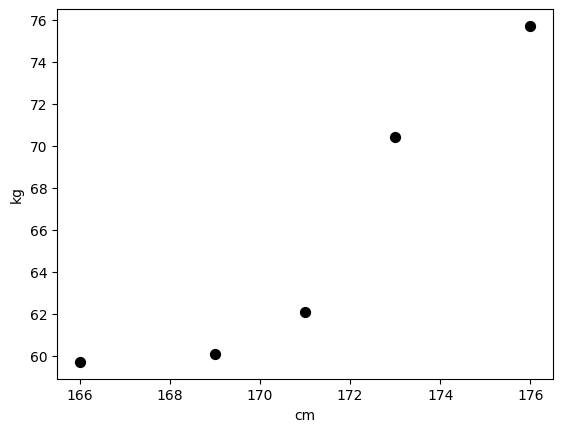

In [20]:
sampleData1 = np.array([
    [166, 59.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

print(sampleData1)

x = sampleData1[:,0]
y = sampleData1[:,1]

plt.scatter(x, y, c='k', s=50)
plt.xlabel('cm')
plt.ylabel('kg')
plt.show()

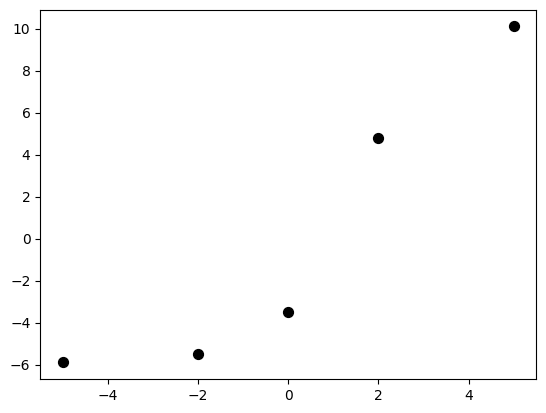

In [21]:
X = x-x.mean()
Y = y-y.mean()

plt.scatter(X, Y, c='k', s=50)
plt.show()

In [22]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
print(X,Y)

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()
print(W,B)

def pred(X):
    return W*X+B
Yp = pred(X)
print(Yp)

tensor([-5.,  5.,  0.,  2., -2.]) tensor([-5.9000, 10.1000, -3.5000,  4.8000, -5.5000])
tensor(1., requires_grad=True) tensor(1., requires_grad=True)
tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


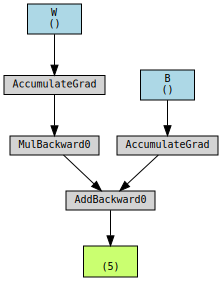

In [23]:
from torchviz import make_dot

params = {'W':W, 'B':B}
g= make_dot(Yp, params=params)
display(g)

In [24]:
def mse(Yp, Y):
    loss = ((Yp-Y)**2).mean()
    return loss

loss = mse(Yp, Y)
print(loss)

tensor(12.8320, grad_fn=<MeanBackward0>)


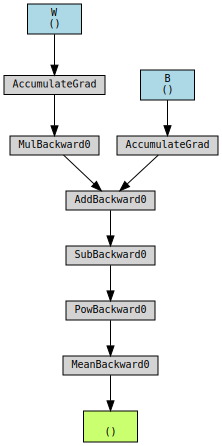

In [25]:
params={'W':W, 'B':B}
g = make_dot(loss, params=params)
display(g)

In [34]:

lr=0.001
with torch.no_grad():
    W-=lr*W.grad
    B-=lr*B.grad    
    W.grad.zero_() # 경사값 초기화 
    B.grad.zero_() # 경사값 초기화 
print(W)
print(B)
print(W.grad)
print(B.grad)


tensor(1.0341, requires_grad=True)
tensor(0.9960, requires_grad=True)
tensor(0.)
tensor(0.)


In [36]:
W=torch.tensor(1.0, requires_grad=True).float() 
B=torch.tensor(1.0, requires_grad=True).float() 

num_epochs=500 
lr=0.001
history=np.zeros((0,2))

for epoch in range(num_epochs):
    Yp=pred(X)
    loss=mse(Yp,Y)
    loss.backward()

    with torch.no_grad():
        W-=lr*W.grad
        B-=lr*B.grad
        W.grad.zero_()
        B.grad.zero_()

    if (epoch%10==0):
        item=np.array([epoch, loss.item()])
        history=np.vstack((history, item))
        print(f'epoch={epoch} loss={loss:.4f}')

print('W=', W.data.numpy())
print('B=', B.data.numpy())
print(f'초기상태 : 손실:{history[0,1]:.4f}')
print(f'초기상태 : 손실:{history[-1,1]:.4f}')


epoch=0 loss=12.8320
epoch=10 loss=10.4482
epoch=20 loss=8.9443
epoch=30 loss=7.9913
epoch=40 loss=7.3831
epoch=50 loss=6.9912
epoch=60 loss=6.7348
epoch=70 loss=6.5638
epoch=80 loss=6.4465
epoch=90 loss=6.3631
epoch=100 loss=6.3015
epoch=110 loss=6.2537
epoch=120 loss=6.2151
epoch=130 loss=6.1824
epoch=140 loss=6.1538
epoch=150 loss=6.1282
epoch=160 loss=6.1046
epoch=170 loss=6.0826
epoch=180 loss=6.0619
epoch=190 loss=6.0424
epoch=200 loss=6.0237
epoch=210 loss=6.0059
epoch=220 loss=5.9888
epoch=230 loss=5.9725
epoch=240 loss=5.9568
epoch=250 loss=5.9418
epoch=260 loss=5.9273
epoch=270 loss=5.9135
epoch=280 loss=5.9001
epoch=290 loss=5.8873
epoch=300 loss=5.8750
epoch=310 loss=5.8632
epoch=320 loss=5.8519
epoch=330 loss=5.8410
epoch=340 loss=5.8305
epoch=350 loss=5.8205
epoch=360 loss=5.8108
epoch=370 loss=5.8015
epoch=380 loss=5.7926
epoch=390 loss=5.7840
epoch=400 loss=5.7758
epoch=410 loss=5.7679
epoch=420 loss=5.7603
epoch=430 loss=5.7530
epoch=440 loss=5.7459
epoch=450 loss=5.73

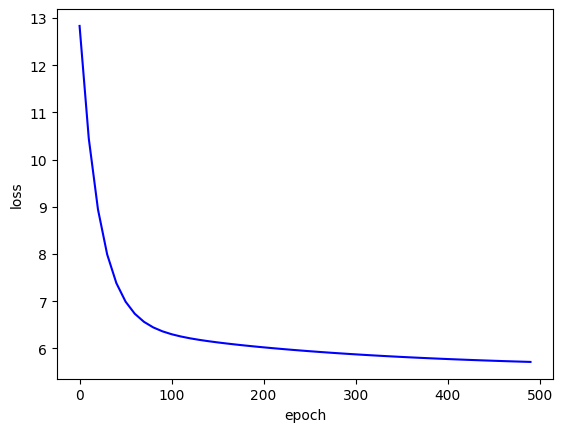

In [38]:
plt.plot(history[:,0],history[:,1], 'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [39]:
W=torch.tensor(1.0, requires_grad=True).float()
B=torch.tensor(1.0, requires_grad=True).float()

num_epochs=500
lr=0.001

import torch.optim as optim 
optimizer = optim.SGD([W,B], lr=lr)
histroy=np.zeros((0,2))

for epoch in range(num_epochs):
    Yp=pred(X)
    loss=mse(Yp,Y)
    loss.backward()
    '''
    with torch.no_grad():
        W-=lr*W.grad
        B-=lr*B.grad
        W.grad.zero_()
        B.grad.zero_()
    '''
    optimizer.step() # 파라미터 수정
    optimizer.zero_grad() # 경삿값 초기화


    if (epoch%10==0):
        item=np.array([epoch, loss.item()])
        history=np.vstack((history, item))
        print(f'epoch={epoch} loss={loss:.4f}')

epoch=0 loss=12.8320
epoch=10 loss=10.4482
epoch=20 loss=8.9443
epoch=30 loss=7.9913
epoch=40 loss=7.3831
epoch=50 loss=6.9912
epoch=60 loss=6.7348
epoch=70 loss=6.5638
epoch=80 loss=6.4465
epoch=90 loss=6.3631
epoch=100 loss=6.3015
epoch=110 loss=6.2537
epoch=120 loss=6.2151
epoch=130 loss=6.1824
epoch=140 loss=6.1538
epoch=150 loss=6.1282
epoch=160 loss=6.1046
epoch=170 loss=6.0826
epoch=180 loss=6.0619
epoch=190 loss=6.0424
epoch=200 loss=6.0237
epoch=210 loss=6.0059
epoch=220 loss=5.9888
epoch=230 loss=5.9725
epoch=240 loss=5.9568
epoch=250 loss=5.9418
epoch=260 loss=5.9273
epoch=270 loss=5.9135
epoch=280 loss=5.9001
epoch=290 loss=5.8873
epoch=300 loss=5.8750
epoch=310 loss=5.8632
epoch=320 loss=5.8519
epoch=330 loss=5.8410
epoch=340 loss=5.8305
epoch=350 loss=5.8205
epoch=360 loss=5.8108
epoch=370 loss=5.8015
epoch=380 loss=5.7926
epoch=390 loss=5.7840
epoch=400 loss=5.7758
epoch=410 loss=5.7679
epoch=420 loss=5.7603
epoch=430 loss=5.7530
epoch=440 loss=5.7459
epoch=450 loss=5.73

In [52]:
import torch.nn as nn

l1=nn.Linear(784,128)
l2=nn.Linear(128,10)
relu=nn.ReLU(inplace=True)

inputs = torch.randn(100,784)
m1=l1(inputs)
m2=relu(m1)
outputs=l2(m2)

print('입력 텐서',inputs.shape)
print('출력 텐서',outputs.shape)

# ==============================================

net2 = nn.Sequential(
    l1, 
    relu,
    l2)

outputs2=net2(inputs)
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs2.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])
입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


1입력 1출력

In [54]:
torch.manual_seed(123)
l1=nn.Linear(1,1)
print(l1)

for param in l1.named_parameters():
    print('name: ', param[0])
    print('tensor:', param[1])
    print('shape:', param[1].shape)
    

Linear(in_features=1, out_features=1, bias=True)
name:  weight
tensor: Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape: torch.Size([1, 1])
name:  bias
tensor: Parameter containing:
tensor([0.0331], requires_grad=True)
shape: torch.Size([1])


In [62]:
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)
print(l1.weight)
print(l1.bias) 
#-> y=2x+1

x_np=np.arange(-2, 2.1, 1)
x=torch.tensor(x_np).float()
x=x.view(-1,1) # (N,1)사이즈로 변경
print(x.shape)
print(x)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)
torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [63]:
y=l1(x)
print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


2입력 1출력

In [65]:
l2=nn.Linear(2,1) # 입력2, 출력1 선형 함수 정의 
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)
# x+x+2
print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [66]:
x2_np=np.array([[0,0],[0,1],[1,0],[1,1]])
x2=torch.tensor(x2_np).float()
print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [67]:
y2=l2(x2)
print(y2.shape)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


2입력 3출력

In [69]:
l3=nn.Linear(2,3)

nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [70]:
y3=l3(x2)
print(y3.shape)
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


In [72]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__() # 부모 클래스 nn.Module 초기화 

        self.l1=nn.Linear(n_input, n_output) # 출력층 정의 

    def forward(self, x):
        x1=self.l1(x) # 선형회귀 
        return x1

In [74]:
inputs=torch.ones(100,1) # 더미 

n_input=1
n_output=1
net=Net(n_input, n_output)

outputs=net(inputs) # 예측